In [354]:
# Importer les bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import RandomizedSearchCV

In [355]:
# Charger les données
file_path = "mushroom_cleaned.csv"  # Remplace par ton chemin de fichier
data = pd.read_csv(file_path)

In [356]:
# Aperçu des données
print("Aperçu des données :")
print(data.head())
print("\nInformations sur les données :")
print(data.info())

Aperçu des données :
   cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
0          1372          2                2          10     3.807467   
1          1461          2                2          10     3.807467   
2          1371          2                2          10     3.612496   
3          1261          6                2          10     3.787572   
4          1305          6                2          10     3.711971   

   stem-width  stem-color    season  class  
0        1545          11  1.804273      1  
1        1557          11  1.804273      1  
2        1566          11  1.804273      1  
3        1566          11  1.804273      1  
4        1464          11  0.943195      1  

Informations sur les données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64 

In [357]:
# Statistiques descriptives 
print("\nStatistiques descriptives :")
print(data.describe().T)


Statistiques descriptives :
                   count         mean         std       min         25%  \
cap-diameter     54035.0   567.257204  359.883763  0.000000  289.000000   
cap-shape        54035.0     4.000315    2.160505  0.000000    2.000000   
gill-attachment  54035.0     2.142056    2.228821  0.000000    0.000000   
gill-color       54035.0     7.329509    3.200266  0.000000    5.000000   
stem-height      54035.0     0.759110    0.650969  0.000426    0.270997   
stem-width       54035.0  1051.081299  782.056076  0.000000  421.000000   
stem-color       54035.0     8.418062    3.262078  0.000000    6.000000   
season           54035.0     0.952163    0.305594  0.027372    0.888450   
class            54035.0     0.549181    0.497580  0.000000    0.000000   

                        50%          75%          max  
cap-diameter     525.000000   781.000000  1891.000000  
cap-shape          5.000000     6.000000     6.000000  
gill-attachment    1.000000     4.000000     6.00000

In [358]:
data.dtypes

cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
class                int64
dtype: object

In [359]:
data.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

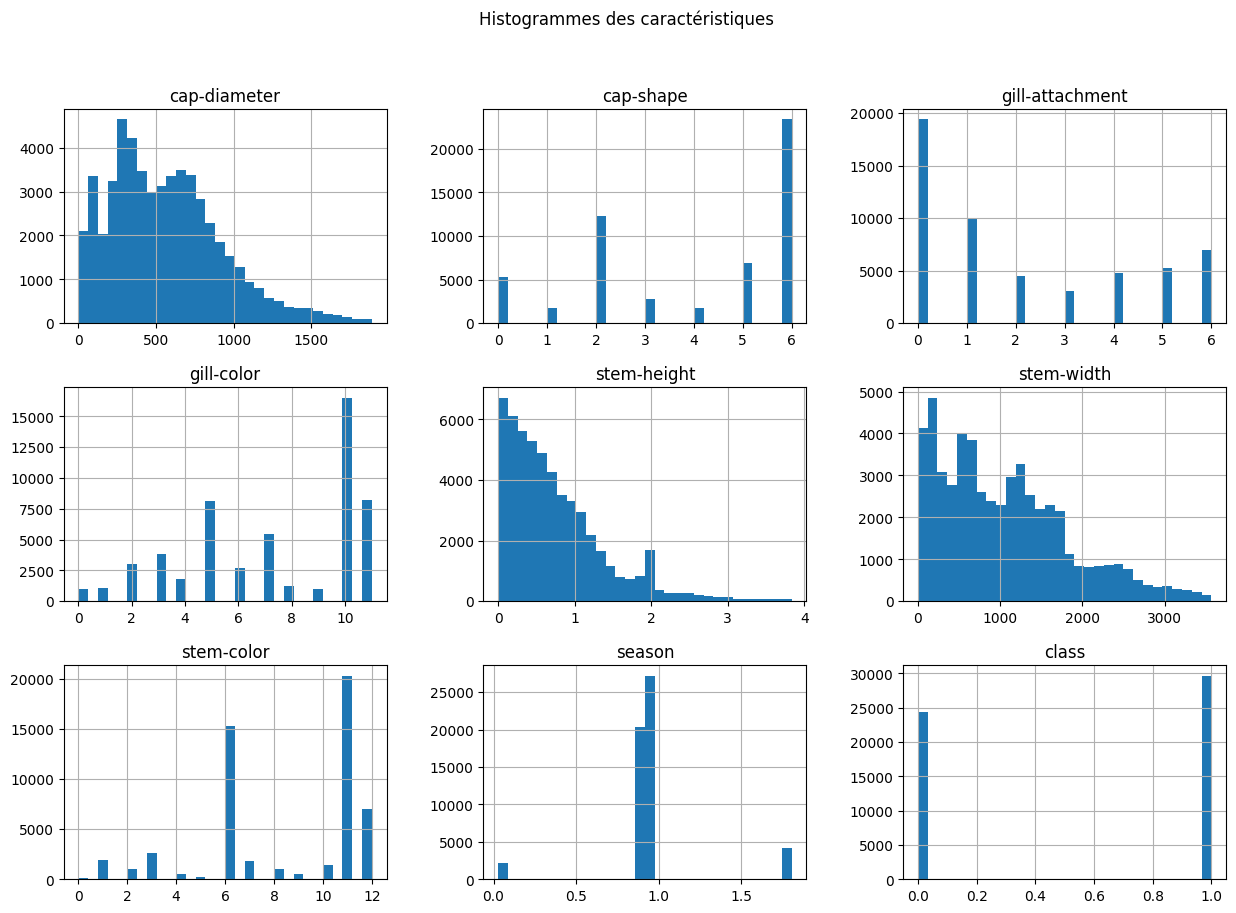

In [360]:
# Histogrammes pour chaque caractéristique 
data.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogrammes des caractéristiques")
plt.show()

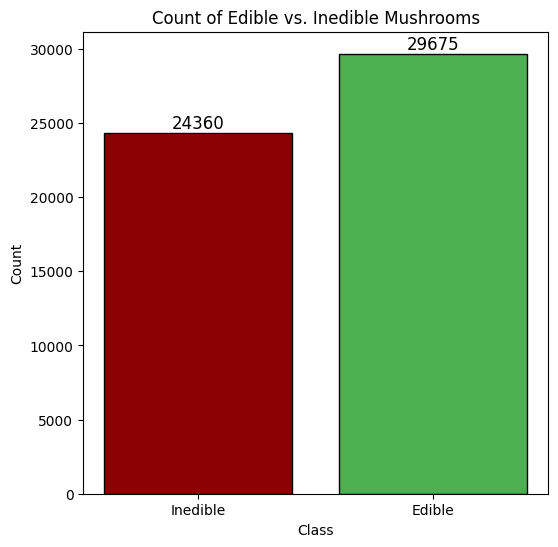

In [361]:
# Statistics on the number of edible and inedible mushrooms.
label_counts = data['class'].value_counts()

plt.figure(figsize=(6,6))
bars = plt.bar(label_counts.index, label_counts.values, color=['#4CAF50','darkred'], edgecolor='black')
plt.xticks(label_counts.index, labels=["Edible", "Inedible"])
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2, # Position x: column center
        bar.get_height(),                  # Position y: height of the column
        int(bar.get_height()),             # Display value
        ha='center',                       
        va='bottom',                       
        fontsize=12                        
    )
plt.title("Count of Edible vs. Inedible Mushrooms")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

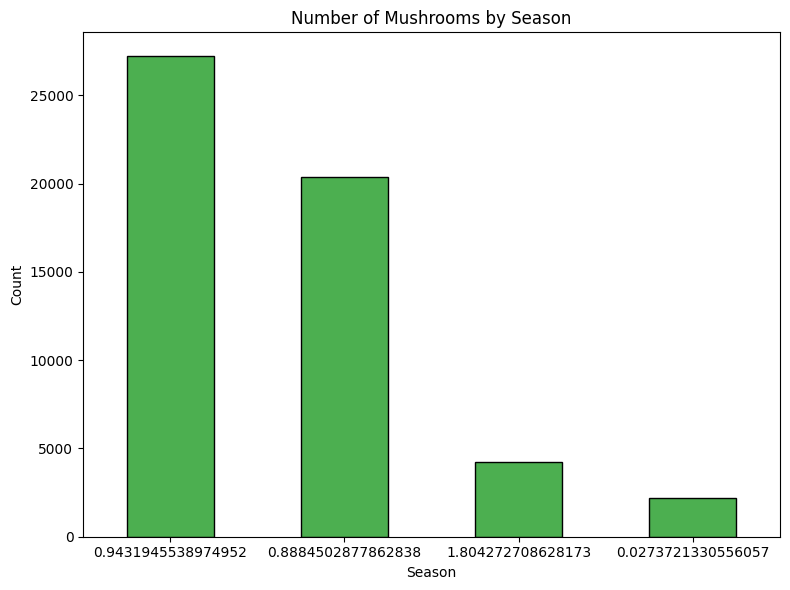

In [362]:
#Statistics on seasonal mushroom numbers.
season_counts = data['season'].value_counts()
plt.figure(figsize=(8, 6))
season_counts.plot(kind='bar', color='#4CAF50', edgecolor='black')
plt.title("Number of Mushrooms by Season")
plt.xlabel("Season")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

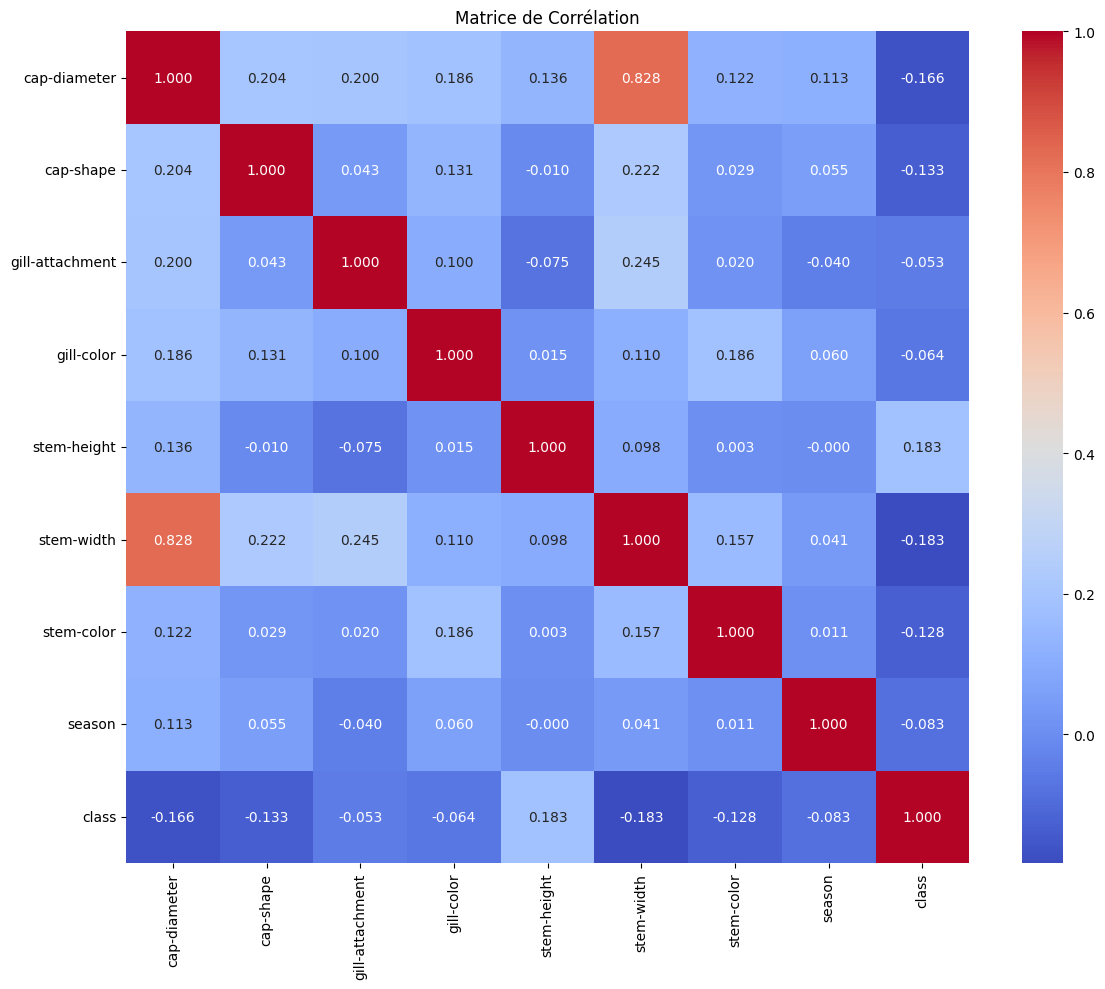

In [363]:
# Matrice de corrélation et heatmap 
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True,cbar=True,fmt='.3f', cmap='coolwarm')
plt.title("Matrice de Corrélation")
plt.tight_layout()
plt.show()

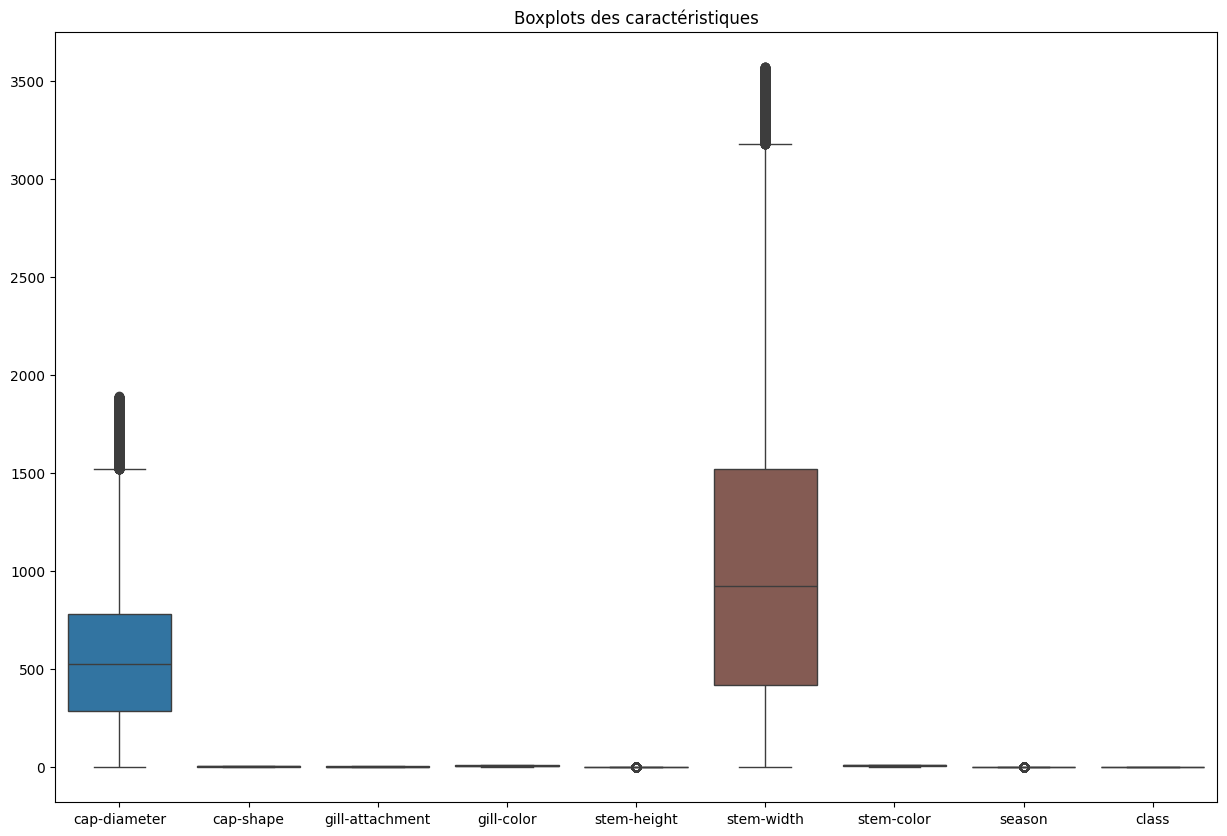

In [364]:
# Boxplots pour visualiser la distribution des valeurs 
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.title("Boxplots des caractéristiques")
plt.show()

In [365]:
# Séparer les caractéristiques (features) et la classe cible (target) 
X = data.drop('class', axis=1) # Toutes les colonnes sauf 'class' 
y = data['class'] # Colonne cible
X.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
0,1372,2,2,10,3.807467,1545,11,1.804273
1,1461,2,2,10,3.807467,1557,11,1.804273
2,1371,2,2,10,3.612496,1566,11,1.804273
3,1261,6,2,10,3.787572,1566,11,1.804273
4,1305,6,2,10,3.711971,1464,11,0.943195


In [366]:
# Diviser les données en ensembles d'entraînement et de test (80% pour l'entraînement)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=42)
X_train.shape, X_test.shape

((43228, 8), (10807, 8))

In [367]:
stander = StandardScaler()
X_train_scaled = stander.fit_transform(X_train)
X_test_scaled = stander.transform(X_test)

In [368]:
def Gridsearch_params(model, param_grid):
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='accuracy',
        cv = 5,
        verbose=1,  
        n_jobs=-1  
    )
    grid_search.fit(X, y)
    # Get the best model
    best_model = grid_search.best_estimator_

    print("Best parameters found:", grid_search.best_params_)
    print("Best mean accuracy:", round(grid_search.best_score_ * 100, 2), "%\n")
    
    return best_model

In [369]:
def evolution_models(model,test):

    y_pred = model.predict(test)
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred,digits=5))
    print("------------------------------------------")

    labels = data['class'].unique()
    labels = list(labels)

    # Caculater to Confution Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non vénéneux", "Vénéneux"], yticklabels=["Non vénéneux", "Vénéneux"])
    plt.title("Matrice de Confusion")
    plt.xlabel("Prédictions")
    plt.ylabel("Vérités")
    plt.show()

Classification Report:
              precision    recall  f1-score   support

           0    0.97770   0.97352   0.97560      4909
           1    0.97804   0.98152   0.97977      5898

    accuracy                        0.97788     10807
   macro avg    0.97787   0.97752   0.97769     10807
weighted avg    0.97788   0.97788   0.97788     10807

------------------------------------------


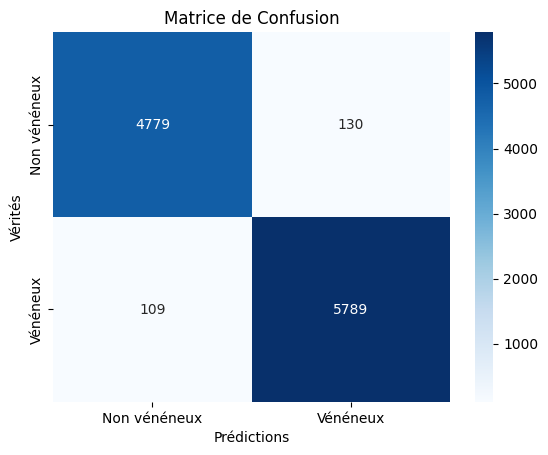

In [370]:
#Decision Tree
base_tree = DecisionTreeClassifier().fit(X_train_scaled, y_train)
evolution_models(base_tree,X_test_scaled)

Classification Report:
              precision    recall  f1-score   support

           0    0.99139   0.98513   0.98825      4909
           1    0.98769   0.99288   0.99028      5898

    accuracy                        0.98936     10807
   macro avg    0.98954   0.98900   0.98926     10807
weighted avg    0.98937   0.98936   0.98936     10807

------------------------------------------


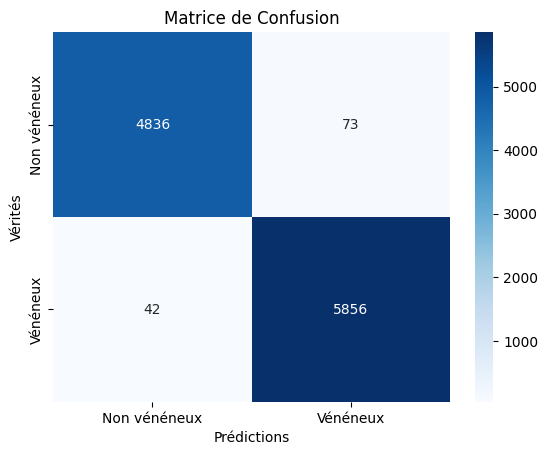

In [371]:
#K-nearest neighbors
base_KNN = KNeighborsClassifier(n_neighbors=1).fit(X_train_scaled, y_train)
evolution_models(base_KNN,X_test_scaled)

Classification Report:
              precision    recall  f1-score   support

           0    0.99102   0.98900   0.99001      4909
           1    0.99086   0.99254   0.99170      5898

    accuracy                        0.99093     10807
   macro avg    0.99094   0.99077   0.99085     10807
weighted avg    0.99093   0.99093   0.99093     10807

------------------------------------------


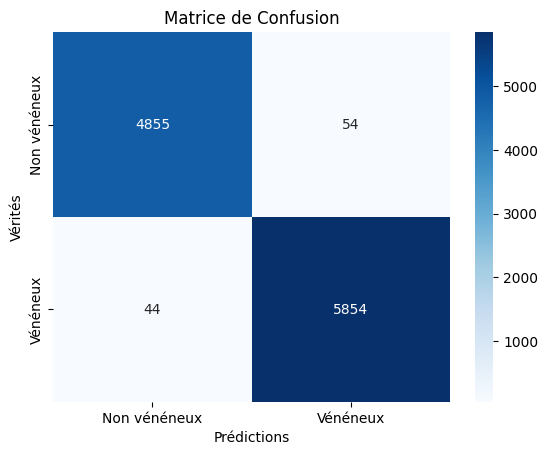

In [372]:
# Créer et entraîner un modèle Random Forest
randomForestClassifier = RandomForestClassifier(n_estimators=100,random_state=0).fit(X_train, y_train)
evolution_models(randomForestClassifier,X_test)

Text(0, 0.5, 'Error Rate')

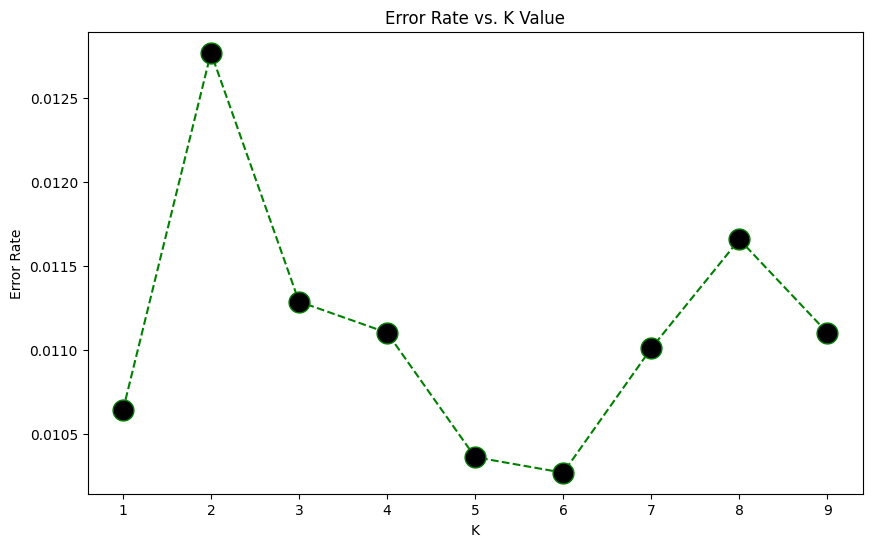

In [373]:
error_rates = []
for i in range(1, 10):
    model = KNeighborsClassifier(n_neighbors=i).fit(X_train_scaled, y_train)
    pred_i = model.predict(X_test_scaled)
    error_rates.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,10), error_rates, color='green', linestyle='dashed', marker='o', markerfacecolor='black', markersize=15)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Classification Report:
              precision    recall  f1-score   support

           0    0.99160   0.98554   0.98856      4909
           1    0.98802   0.99305   0.99053      5898

    accuracy                        0.98964     10807
   macro avg    0.98981   0.98929   0.98954     10807
weighted avg    0.98965   0.98964   0.98963     10807

------------------------------------------


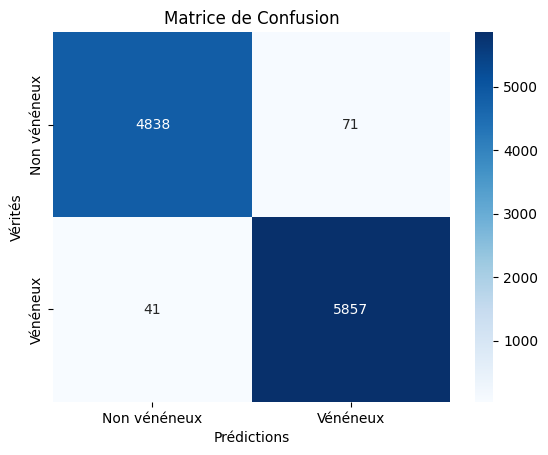

In [374]:
base_KNN_op = KNeighborsClassifier(n_neighbors=5).fit(X_train_scaled, y_train)
evolution_models(base_KNN_op,X_test_scaled)

In [381]:
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'bootstrap': [True, False]
}
random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid_rf,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2,
    n_iter=10,
    error_score='raise'
).fit(X_train, y_train)
best_params = random_search_rf.best_params_
print("Meilleurs paramètres :", best_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Meilleurs paramètres : {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}


Classification Report:
              precision    recall  f1-score   support

           0    0.99123   0.98961   0.99042      4909
           1    0.99136   0.99271   0.99204      5898

    accuracy                        0.99130     10807
   macro avg    0.99130   0.99116   0.99123     10807
weighted avg    0.99130   0.99130   0.99130     10807

------------------------------------------


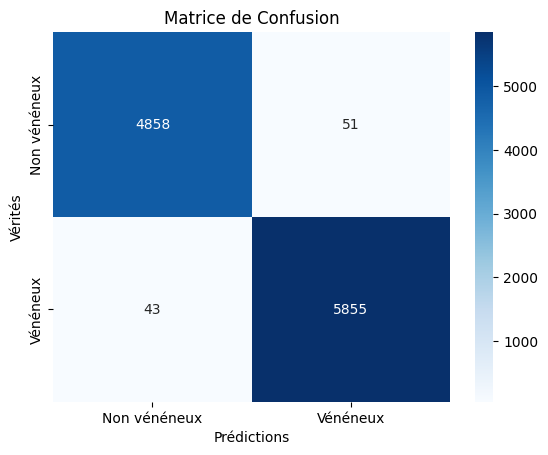

In [384]:
OprandomForestClassifier = RandomForestClassifier(n_estimators=300, min_samples_split=2, min_samples_leaf= 1, max_features= 'sqrt', max_depth=20, bootstrap=True).fit(X_train, y_train)
evolution_models(OprandomForestClassifier,X_test)